In [86]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
from collections import Counter

In [87]:
def display_random_images(image_path, rows, cols):
 # Get a list of all image files in the directory
    image_files = [f for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]

    # Calculate the total number of images to display
    total_images = rows * cols
    
    # Randomly select images from the list
    selected_images = random.sample(image_files, total_images)

    # Create the subplot grid
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2.5, rows * 2.5))

    # Loop through the selected images and plot them
    for i, ax in enumerate(axes.flat):
        # Load the image
        img = Image.open(os.path.join(image_path, selected_images[i]))

        # Extract the filename and pain score from the file name
        filename = selected_images[i]
        parts = filename.split('_')
        pain_score = parts[-1].split('.')[0]  # Assumes format like 'stargan2_1_1.png'
        display_name = f"face_no:{parts[1]}"
        
        # Display the image
        ax.imshow(img)
        ax.axis('off')  # Hide the axis
        
        # Set the title for the subplot with larger font size
        ax.set_title(display_name, fontsize=12)

    # Adjust the layout to prevent overlap
    plt.tight_layout()
    plt.show()

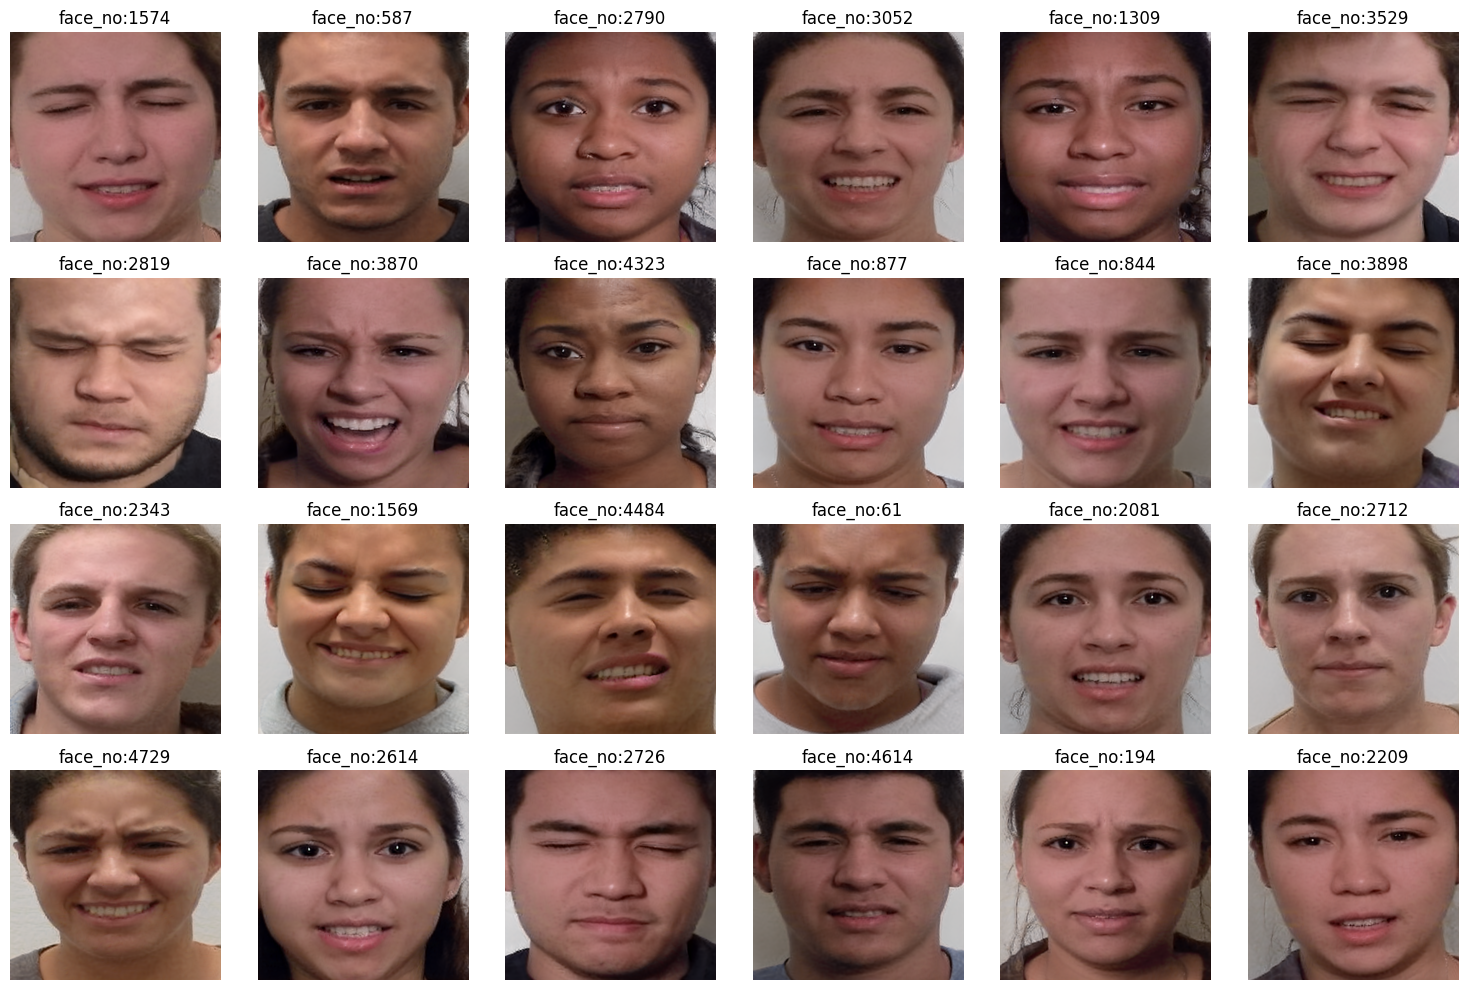

In [88]:
display_random_images("D:/MS/Dissertation/Output_results/Pre-pred/Stargan-2", 4, 6)

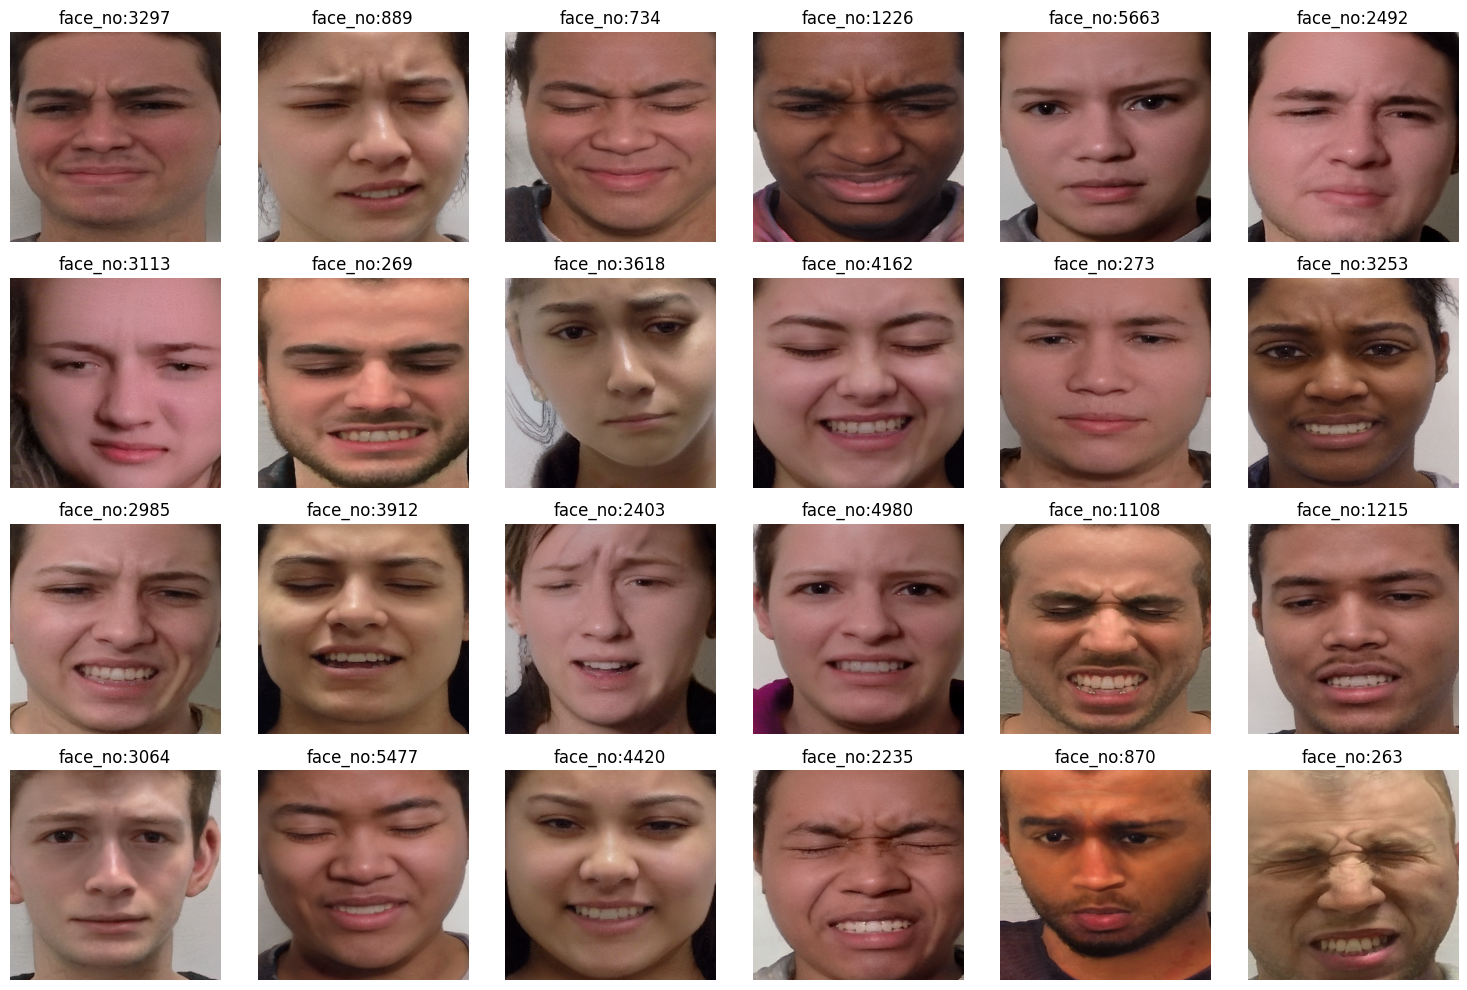

In [89]:
display_random_images("D:/MS/Dissertation/Output_results/Pre-pred/Stargan-3", 4, 6)

In [90]:
def visualize_images_by_combined_pain_score(image_path, adjust=False):
    # Get a list of all image files in the directory
    image_files = [f for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]

    # Extract and combine pain scores from filenames
    combined_pain_scores = []
    for filename in image_files:
        parts = filename.split('_')
        try:
            # Extract the last part as the pain score
            pain_score = parts[-1].split('.')[0]  # Assumes format like 'stargan2_1_1.png'
            if pain_score.isdigit():  # Ensure the pain score is a digit
                combined_score = pain_score
                combined_pain_scores.append(combined_score)
            else:
                print(f"Skipping file with non-numeric pain score: {filename}")
        except (IndexError, ValueError):
            # Handle any filename format errors gracefully
            print(f"Skipping file with unexpected format: {filename}")

    # Count the number of images for each combined pain score
    combined_score_counts = Counter(combined_pain_scores)

    # Prepare data for plotting
    scores = sorted(combined_score_counts.keys(), key=int)  # Sort scores numerically
    counts = [combined_score_counts[score] for score in scores]

    if adjust:
        # Adjust the pain scores for the x-axis labels
        adjusted_scores = [int(score) + 1 for score in scores]

    # Calculate total number of images
    total_images = sum(counts)

    # Define colors for the bars
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    if adjust:
        bars = plt.bar(adjusted_scores, counts, color=colors[:len(adjusted_scores)])
    else:
        bars = plt.bar(scores, counts, color=colors[:len(scores)])
        
    plt.xlabel('Adjusted Pain Score' if adjust else 'Pain Score')
    plt.ylabel('Number of Images')
    plt.title(f'Number of Images Generated According to Pain Score (Total: {total_images} images)')

    # Add text annotations on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

    # Adjust layout to remove extra space
    plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)

    plt.show()

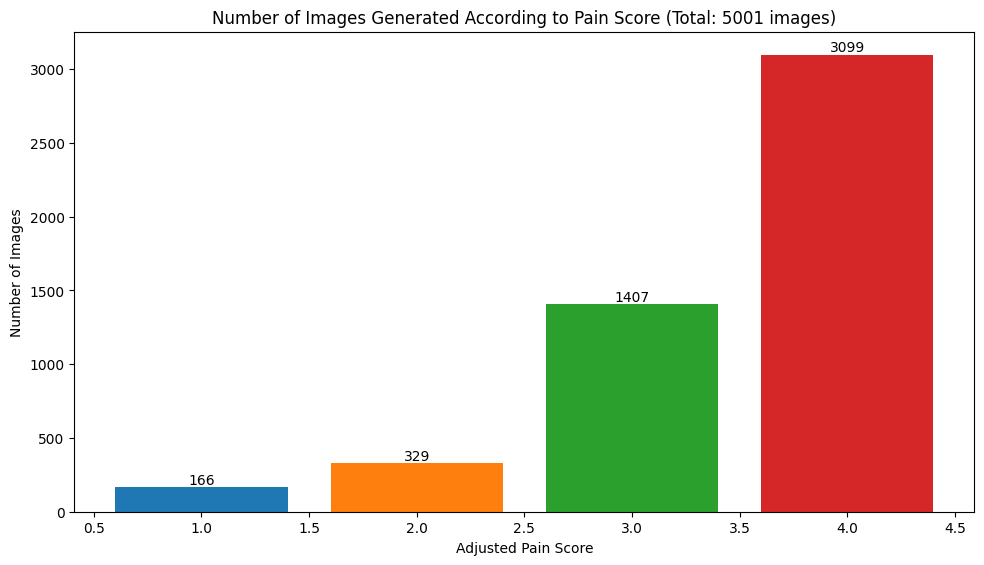

In [91]:
visualize_images_by_combined_pain_score("D:/MS/Dissertation/Output_results/Pre-pred/Stargan-2", adjust=True)

Skipping file with non-numeric pain score: stargan3_0_.png
Skipping file with non-numeric pain score: stargan3_1111_.png


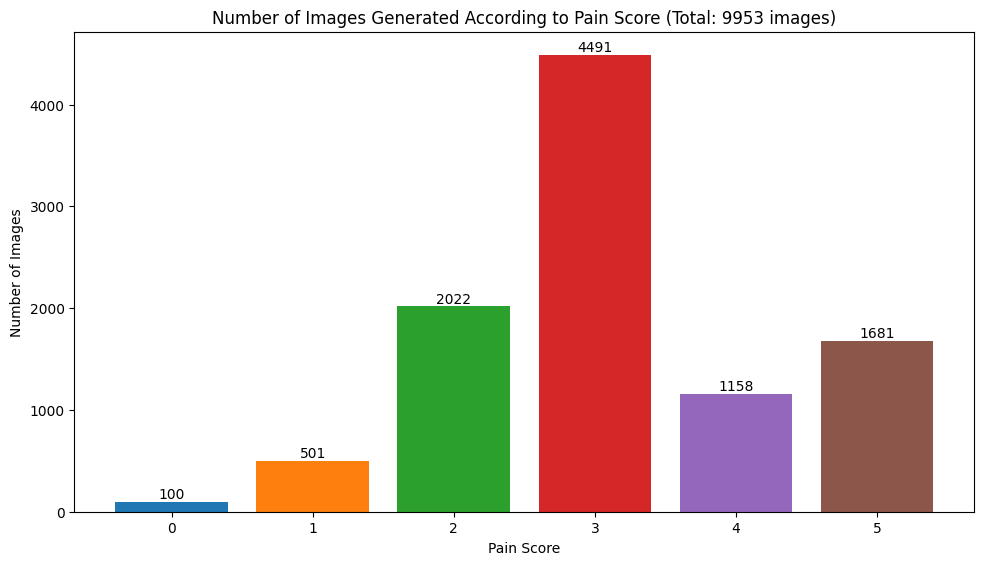

In [92]:
visualize_images_by_combined_pain_score("D:/MS/Dissertation/Output_results/Pre-pred/Stargan-3")